In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import math
import re
import pylab
from pylab import figure, show, legend
from mpl_toolkits.axes_grid1 import host_subplot
%matplotlib inline

In [82]:
fp = open('corel_.txt', 'r')

train_iterations = []
train_loss = []
test_iterations = []
test_accuracy = []
fire_rate=[]
classfication_error=[]
forcing_binary=[]
loss_binary=[]

In [83]:
for ln in fp:
  # get train_iterations and train_loss
  if '228] Iteration' in  ln:
    arr = re.findall(r'ion \b\d+\b,',ln)
    train_iterations.append(int(arr[0].strip(',')[4:]))
    train_loss.append(float(ln.strip().split(' = ')[-1]))
  # get test_iteraitions
  if '] Iteration' in ln and 'Testing net (#0)' in ln:
    arr = re.findall(r'ion \b\d+\b,',ln)
    test_iterations.append(int(arr[0].strip(',')[4:]))
  # get test_accuracy
  if 'Test net output #0:' in ln and 'accuracy' in ln:
    test_accuracy.append(float(ln.split('accuracy = ')[-1]))
  # get 50%-fire-rate loss
  if '404]     Test net output #1: loss: 50%-fire-rate = ' in ln:
    x=ln.split(' (')[0].split('50%-fire-rate = ')[-1]
    fire_rate.append(float(x))
  # get classfication-error
  if '404]     Test net output #2: loss: forcing-binary =:' in ln:
    classfication_error.append(float(ln.split(' (')[0].split('classfication-error = ')[-1]))
  # get forcing_binary-error
  if '404]     Test net output #3: loss: loss_binaried ='in ln:
    j=ln.split(' (')[0].split('loss_binaried = ')[-1]
    forcing_binary.append(float(j))
  # get loss_binary-error
  if '404]     Test net output #4: loss:classification =' in ln:
    y=ln.split(' (')[0].split('loss:classification = ')[-1]
    loss_binary.append(float(y))

In [84]:
len(forcing_binary)

101

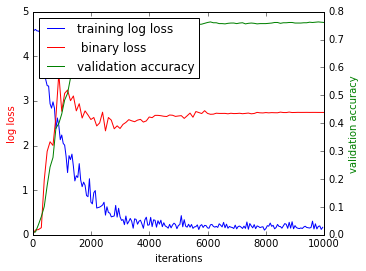

In [85]:
host = host_subplot(111)
plt.subplots_adjust(right=0.8) # ajust the right boundary of the plot window
par1 = host.twinx()
# set labels
host.set_xlabel("iterations")
host.set_ylabel("log loss")
par1.set_ylabel("validation accuracy")

# plot curves
p1, = host.plot(train_iterations, train_loss, label="training log loss")
p2, = par1.plot(test_iterations, test_accuracy, label="validation accuracy")
p3, = host.plot(test_iterations,forcing_binary, label=" binary loss")
# set location of the legend, 
# 1->rightup corner, 2->leftup corner, 3->leftdown corner
# 4->rightdown corner, 5->rightmid ...
host.legend(loc=2)

# set label color
host.axis["left"].label.set_color(p1.get_color())
host.axis["left"].label.set_color(p3.get_color())
par1.axis["right"].label.set_color(p2.get_color())
# set the range of x axis of host and y axis of par1

plt.draw()
plt.show()

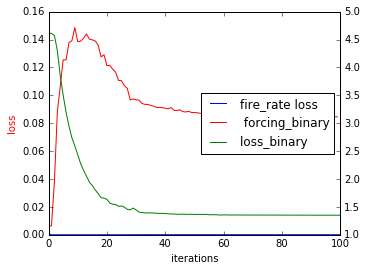

In [75]:
host = host_subplot(111)
plt.subplots_adjust(right=0.8) # ajust the right boundary of the plot window
par1 = host.twinx()
# set labels
host.set_xlabel("iterations")
host.set_ylabel("loss")

# plot curves
p1, = host.plot(fire_rate, label="fire_rate loss")
p2, = par1.plot( loss_binary, label="loss_binary ")
p3, = host.plot(forcing_binary, label=" forcing_binary")
# set location of the legend, 
# 1->rightup corner, 2->leftup corner, 3->leftdown corner
# 4->rightdown corner, 5->rightmid ...
host.legend(loc=5)

# set label color
host.axis["left"].label.set_color(p1.get_color())
host.axis["left"].label.set_color(p3.get_color())
par1.axis["right"].label.set_color(p2.get_color())
# set the range of x axis of host and y axis of par1

plt.draw()
plt.show()

In [15]:
fire_rate

[]